In [1]:
import pandas as pd

In [8]:
Squares=pd.Series([i*i for i in range(100)])

In [9]:
Squares.head()

0     0
1     1
2     4
3     9
4    16
dtype: int64

In [10]:
Squares[97:100]

97    9409
98    9604
99    9801
dtype: int64

In [11]:
Squares.tail(3)

97    9409
98    9604
99    9801
dtype: int64

In [12]:
Squares[97:100].equals(Squares.tail(3))

True

### Now we are going to see much needed function read_csv() and its parameters
Link to doc: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

By Default read_csv() always returns DataFrame but if there is only 1 column is returned then u have a parameter squeeze to be changed to True to get as series, By default it sets to false

In [4]:
import pandas as pd
alcohol = pd.read_csv('https://gist.githubusercontent.com/sh7ata/e075ff35b51ebb0d2d577fbe1d19ebc9/raw/b966d02c7c26bcca60703acb1390e938a65a35cb/drinks.csv'
            ,usecols=['country','wine_servings'],index_col='country',squeeze =True)


'''Squeeze parameter going to be removed instead we need to use .squeeze (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.squeeze.html)'''

C:\Users\sgdee\AppData\Local\Temp\ipykernel_26948\555731800.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  alcohol = pd.read_csv('https://gist.githubusercontent.com/sh7ata/e075ff35b51ebb0d2d577fbe1d19ebc9/raw/b966d02c7c26bcca60703acb1390e938a65a35cb/drinks.csv'


'Squeeze parameter going to be removed instead we need to use .squeeze (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.squeeze.html)'

In [18]:
type(alcohol)

pandas.core.series.Series

In [21]:
alcohol=pd.Series(alcohol,name='alcohol')

In [24]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: alcohol, dtype: float64

In [23]:
alcohol.is_unique

False

In [25]:
#checking top 5 is unique or not
alcohol.head().is_unique

True

In [29]:
#n unique gives exact count of how many unique values in that series which by default excludes "NA" na is like missing values/ no particular value assigned

#we can check with NA count as well by changing parameter dropna=False
alcohol.nunique()

71

In [30]:
alcohol.nunique(dropna=False)

72

Monotonicity like the given values is always increasing/decreasing it comes from Math concept - order of functions

In [39]:
##Monotonicity
pd.Series([1,2,3,5]).is_monotonic

True

In [34]:
#even multiple same values also holds the concept of order so it will return true
pd.Series([1,2,3,5,55,55,55,55]).is_monotonic

True

In [48]:
a=pd.Series([6,5,2])

In [49]:
a.is_monotonic

False

#### is_monotonic is an alias for is_monotonic_decreasing and even u give decreasing list it will return FALSE becoz its an alias for monotonic increase, so we need to use series.is_monotonic_decrease

In [50]:
a.is_monotonic_decreasing

True

### Count gives number of non NA data but size count everything

In [51]:
alcohol.size

193

In [52]:
alcohol.count()

162

In [54]:
#To Verfiy our series has NA we can use below functions
alcohol.hasnans

True

In [55]:
alcohol.isnull()

country
Afghanistan     True
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam        False
Yemen           True
Zambia         False
Zimbabwe       False
Name: alcohol, Length: 193, dtype: bool

#### Below are Methods on handling NAN/NA in series

In [56]:
alcohol.isnull().all()
#check whether all data is null or not

False

In [62]:
#taking out countries which has NA/Null values
list(alcohol[alcohol.isnull()].index)

['Afghanistan',
 'Bangladesh',
 'Bhutan',
 'Burundi',
 'North Korea',
 'Eritrea',
 'Ethiopia',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Kuwait',
 'Lesotho',
 'Libya',
 'Malaysia',
 'Maldives',
 'Marshall Islands',
 'Mauritania',
 'Monaco',
 'Myanmar',
 'Nepal',
 'Pakistan',
 'Rwanda',
 'San Marino',
 'Saudi Arabia',
 'Somalia',
 'Sri Lanka',
 'Sudan',
 'Tajikistan',
 'Uganda',
 'Yemen']

In [63]:
alcohol.isnull().sum()

31

In [65]:
#Why the above line works is in python boolean is integer operatable so each true is 1 and it can be summed
sum([True,True,False,True])

3

In [66]:
alcohol.isna().sum()

31

In [3]:
alcohol.notnull()

country
Afghanistan    False
Albania         True
Algeria         True
Andorra         True
Angola          True
               ...  
Venezuela       True
Vietnam         True
Yemen          False
Zambia          True
Zimbabwe        True
Name: wine_servings, Length: 193, dtype: bool

In [4]:
alcohol.notnull().sum()

162

In [5]:
alcohol.count()

162

In [6]:
alcohol.notnull().sum() + alcohol.isnull().sum() == alcohol.size

True

   #### Boolean is treated as int in python as boolean is a subclqass of interger which is a subclass of object. You can see the same in method resolution order.

In [10]:
type(True)

bool

In [15]:
bool.__mro__
## while resplving any method function it looks in bool first then see in int then go to object thats why .sum() works for boolean as 
##its present in int

(bool, int, object)

In [12]:
float.__mro__

(float, object)

In [17]:
#Assining non null data to wine servings
wine_servings=alcohol[alcohol.notnull()]

In [19]:
wine_servings.isnull().sum()
#good it worked

0

In [42]:
##Total wine consumed by all countries . ##sum by default ignores NA
wine_servings.sum()

8221.0

In [25]:
wine_servings.head(3).sum()

380.0

In [26]:
wine_servings.head(3)

country
Albania     54.0
Algeria     14.0
Andorra    312.0
Name: wine_servings, dtype: float64

In [33]:
wine_servings >100

country
Albania              False
Algeria              False
Andorra               True
Angola               False
Antigua & Barbuda    False
                     ...  
Vanuatu              False
Venezuela            False
Vietnam              False
Zambia               False
Zimbabwe             False
Name: wine_servings, Length: 162, dtype: bool

In [32]:
#calcultaing total sum of wine consumed only for countries which consumed more than 100
wine_servings[wine_servings >100].sum()

5805.0

### Droping and Filling NAs

In [35]:
alcohol.size

193

In [38]:
#To drop NA values it wont change source but just gives copy of series without NAs
alcohol.dropna()

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [39]:
#If you want to change the source then dropna method we need to change parameter "inplace =True" so it will drop all NA and
#that source will get modified and returned . by default it will be set to False

#alcohol.dropna(inplace=True)
# or you can reassign or you can reassign => alcohol = alcohol.dropna()

#### Replacing NA or filling NA wchihc can be helpful in some cases

In [40]:
#Method used is fillna(100,inplace=False) Here 100 is wehat you want to fill/replace in NA you can give ur w+own value
alcohol.fillna(100,inplace=False)

country
Afghanistan    100.0
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          100.0
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [41]:
#Both methods by default return copy wont change original if need to be chage original then change "inplace" parameter

### Basic Descriptive Statistic Functions

In [5]:
#Average
alcohol.sum()/alcohol.count()

50.74691358024691

In [6]:
#in built function also there
alcohol.mean()

50.74691358024691

In [7]:
alcohol.median()


11.5

In [9]:
alcohol.quantile(.5)

11.5

#### We can obsere+ve that average and mean has so much difference it mostly skewed here its positive skewed ie) more high value observation

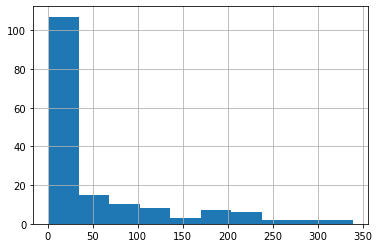

In [8]:
alcohol.hist()

In [10]:
inter_quartile_range =alcohol.quantile(.75) - alcohol.quantile(.25)

In [11]:
inter_quartile_range 

58.25

In [12]:
alcohol.min()

1.0

In [13]:
alcohol.max()

339.0

In [14]:
alcohol.std()

76.13491716376173

In [16]:
alcohol.var()

5796.52561153286

### Describe Method -> All basic Stats details can be retrived from this

In [18]:
alcohol.describe()

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
25%        3.000000
50%       11.500000
75%       61.250000
max      339.000000
Name: wine_servings, dtype: float64

### Mode and value_counts

In [26]:
#Mode will give what is the highest repeated value and value counts we get sorted series of count of occurance for all unique values


In [20]:
alcohol.mode()
# so 1 is the most repeated value

0    1.0
Name: wine_servings, dtype: float64

In [23]:
alcohol[alcohol==1].size
#how many coutnries have 1 

28

In [25]:
alcohol.value_counts()

1.0      28
2.0      10
7.0       9
8.0       7
5.0       6
         ..
218.0     1
185.0     1
78.0      1
165.0     1
22.0      1
Name: wine_servings, Length: 71, dtype: int64

In [27]:
alcohol.value_counts(normalize=True)

1.0      0.172840
2.0      0.061728
7.0      0.055556
8.0      0.043210
5.0      0.037037
           ...   
218.0    0.006173
185.0    0.006173
78.0     0.006173
165.0    0.006173
22.0     0.006173
Name: wine_servings, Length: 71, dtype: float64

In [28]:
alcohol[alcohol==1].size/alcohol.count()

0.1728395061728395

### idxmax() and idxmin()

##### if you want to get only index value of the max , in this case like you want to get country which has highest consumption means we have inbuilt function for that idxmax() , same way for minimum its idxmin()

###### But there is a catch it only retunrs the one max/min index if there are many it will sort and the least index/ if alphabet means
###### that order will be followed. in this case we have so many minimum consuming countries but we get only brunei becoz its alphabatical first

In [30]:
#using max we can gett but bit clumsy
alcohol[alcohol==alcohol.max()]

country
Portugal    339.0
Name: wine_servings, dtype: float64

In [31]:
alcohol.idxmax()

'Portugal'

In [32]:
alcohol.idxmin()

'Brunei'

In [33]:
alcohol[alcohol==alcohol.min()]

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Ghana                       1.0
Guyana                      1.0
Haiti                       1.0
Jordan                      1.0
Kiribati                    1.0
Malawi                      1.0
Mali                        1.0
Morocco                     1.0
Namibia                     1.0
Nicaragua                   1.0
Niger                       1.0
Oman                        1.0
Papua New Guinea            1.0
Philippines                 1.0
Solomon Islands             1.0
Thailand                    1.0
Tanzania                    1.0
Vietnam                     1.0
Name: wine_servings, dtype: float64

### Sorting => return copy of sorted one | to make changes affect source change inplace =True

In [34]:
alcohol.sort_values()

country
Thailand           1.0
Solomon Islands    1.0
Brunei             1.0
Haiti              1.0
Cambodia           1.0
                  ... 
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, Length: 193, dtype: float64

In [39]:
#To sort descending  na_position => to keep na posiions like first last
alcohol.sort_values(ascending=False, na_position='last',inplace=False)

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
              ...  
Sri Lanka       NaN
Sudan           NaN
Tajikistan      NaN
Uganda          NaN
Yemen           NaN
Name: wine_servings, Length: 193, dtype: float64

### nLargest nSmallest => to get top n smallest/largest values

In [40]:
alcohol.nlargest(n=10)

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [41]:
alcohol.nsmallest(n=10)

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Name: wine_servings, dtype: float64

In [46]:
#Another way using sort but it has different order becoz nsmallest/nlargest sort index also but sort_values only the vlaues
alcohol.sort_values(ascending =True)[:10]

country
Thailand                    1.0
Solomon Islands             1.0
Brunei                      1.0
Haiti                       1.0
Cambodia                    1.0
Guyana                      1.0
Canada                      1.0
Jordan                      1.0
Central African Republic    1.0
Comoros                     1.0
Name: wine_servings, dtype: float64

In [1]:
import pandas as pd 

In [19]:
import pandas as pd
alcohol = pd.read_csv('https://gist.githubusercontent.com/sh7ata/e075ff35b51ebb0d2d577fbe1d19ebc9/raw/b966d02c7c26bcca60703acb1390e938a65a35cb/drinks.csv'
            ,usecols=['country','wine_servings'],index_col='country',squeeze =True)


'''Squeeze parameter going to be removed instead we need to use .squeeze (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.squeeze.html)'''

C:\Users\sgdee\AppData\Local\Temp\ipykernel_12040\555731800.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  alcohol = pd.read_csv('https://gist.githubusercontent.com/sh7ata/e075ff35b51ebb0d2d577fbe1d19ebc9/raw/b966d02c7c26bcca60703acb1390e938a65a35cb/drinks.csv'


'Squeeze parameter going to be removed instead we need to use .squeeze (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.squeeze.html)'

### Sort_values() & Sort_index()

In [4]:
alcohol.sort_values(na_position='last')

country
Thailand           1.0
Solomon Islands    1.0
Brunei             1.0
Haiti              1.0
Cambodia           1.0
                  ... 
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, Length: 193, dtype: float64

In [6]:
alcohol.sort_index(na_position='last')
#even though yoou use na position here set to last it not eflecting becoz there is no NA in index and we are using sort_index so

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [8]:
alcohol.index.isna().sum()

0

In [17]:
alcohol.isna().sum()

31

### skill challenge 

In [21]:
#countries with more than 50 wine servings
fifty_plus=alcohol[alcohol >50]

In [28]:
fifty_plus.count()

48

In [30]:
fifty_plus.nsmallest(n=20)

country
Bahamas                51.0
Seychelles             51.0
Albania                54.0
Lithuania              56.0
Poland                 56.0
Estonia                59.0
Gabon                  59.0
Latvia                 62.0
St. Lucia              71.0
Russian Federation     73.0
Cook Islands           74.0
Paraguay               74.0
Iceland                78.0
South Africa           81.0
USA                    84.0
Macedonia              86.0
Bulgaria               94.0
Finland                97.0
Spain                 112.0
Cyprus                113.0
Name: wine_servings, dtype: float64

In [25]:
fifty_plus.sort_values().head(20).describe()

count     20.000000
mean      74.250000
std       19.072921
min       51.000000
25%       58.250000
50%       73.500000
75%       84.500000
max      113.000000
Name: wine_servings, dtype: float64

In [32]:
fifty_plus.nsmallest(n=20).describe()

count     20.000000
mean      74.250000
std       19.072921
min       51.000000
25%       58.250000
50%       73.500000
75%       84.500000
max      113.000000
Name: wine_servings, dtype: float64

### Series Arthmetic and fill values

###### If you want to add/ any arthmetic operation to as series that is possible by default

In [35]:
(alcohol +2).head()

country
Afghanistan      NaN
Albania         56.0
Algeria         16.0
Andorra        314.0
Angola          47.0
Name: wine_servings, dtype: float64

In [37]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [38]:
## you can see that it added 2 to all values. Like this all arthmetic operations are possible

In [41]:
(alcohol *20 -4).head()

country
Afghanistan       NaN
Albania        1076.0
Algeria         276.0
Andorra        6236.0
Angola          896.0
Name: wine_servings, dtype: float64

In [42]:
alcohol.sort_index().head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [52]:
#lets say you want to add below to alcohol
more_value=pd.Series({'Albania':52})

In [53]:
alcohol + more_value

Afghanistan      NaN
Albania        106.0
Algeria          NaN
Andorra          NaN
Angola           NaN
               ...  
Venezuela        NaN
Vietnam          NaN
Yemen            NaN
Zambia           NaN
Zimbabwe         NaN
Length: 193, dtype: float64

In [54]:
# something fishy we did got albania added with more_values but others goign as NA , becoz no matching for them

# To rectify this use ADD METHOD AND FILL VALUE AS 0 


In [56]:
alcohol.add(more_value,fill_value=0)

Afghanistan      NaN
Albania        106.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Length: 193, dtype: float64

In [58]:
#Now we got what we want  below is syntax for subtract

In [59]:
alcohol.subtract(more_value,fill_value=0)

Afghanistan      NaN
Albania          2.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Length: 193, dtype: float64

In [60]:
# for multiplication and divide
#alcohol.multiply(more_value,fill_value=1)
#alcohol.divide(more_value,fill_value=1)

#### Replicating var() and std() method

In [61]:
alcohol.var()

5796.52561153286

In [63]:
(alcohol.subtract(alcohol.mean())**2).sum()/(alcohol.count() -1)

5796.5256115328575

In [64]:
alcohol.std()

76.13491716376173

In [65]:
## standard deviation is square root of variance hence taking root

In [67]:
((alcohol.subtract(alcohol.mean())**2).sum()/(alcohol.count() -1))**(1/2)

76.13491716376171

### Cummulative operations cumprod() cumsum() cummax()...

In [68]:
alcohol.cumsum()

country
Afghanistan       NaN
Albania          54.0
Algeria          68.0
Andorra         380.0
Angola          425.0
                ...  
Venezuela      8212.0
Vietnam        8213.0
Yemen             NaN
Zambia         8217.0
Zimbabwe       8221.0
Name: wine_servings, Length: 193, dtype: float64

In [69]:
alcohol.sum()

8221.0

In [70]:
alcohol.prod()

3.427611505218281e+183

In [71]:
alcohol.max()

339.0

In [72]:
alcohol.cummax()

country
Afghanistan      NaN
Albania         54.0
Algeria         54.0
Andorra        312.0
Angola         312.0
               ...  
Venezuela      339.0
Vietnam        339.0
Yemen            NaN
Zambia         339.0
Zimbabwe       339.0
Name: wine_servings, Length: 193, dtype: float64

### Series Iterations

In [73]:
mini_alcohol= alcohol[:10]

In [75]:
for i in mini_alcohol:
    print(i)

nan
54.0
14.0
312.0
45.0
45.0
221.0
11.0
212.0
191.0


In [76]:
for i in mini_alcohol.index:
    print(i)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua & Barbuda
Argentina
Armenia
Australia
Austria


In [77]:
for i in mini_alcohol.index:
    print(i," ",mini_alcohol[i])

Afghanistan   nan
Albania   54.0
Algeria   14.0
Andorra   312.0
Angola   45.0
Antigua & Barbuda   45.0
Argentina   221.0
Armenia   11.0
Australia   212.0
Austria   191.0


In [80]:
## convinient one
for i in mini_alcohol.items():
    print(i)

('Afghanistan', nan)
('Albania', 54.0)
('Algeria', 14.0)
('Andorra', 312.0)
('Angola', 45.0)
('Antigua & Barbuda', 45.0)
('Argentina', 221.0)
('Armenia', 11.0)
('Australia', 212.0)
('Austria', 191.0)


 ## Filtering filter(), where(), mask()

In [81]:
#using regex regular expressions to filter out coountries name start with V

In [83]:
alcohol.filter(regex='^V')

country
Vanuatu      11.0
Venezuela     3.0
Vietnam       1.0
Name: wine_servings, dtype: float64

In [85]:
#to fetch countries havin stan in it
alcohol.filter(like='stan')

country
Afghanistan      NaN
Kazakhstan      12.0
Kyrgyzstan       6.0
Pakistan         NaN
Tajikistan       NaN
Turkmenistan    32.0
Uzbekistan       8.0
Name: wine_servings, dtype: float64

In [87]:
#this filter works on index what if you want it on value below is a example

In [89]:
def getval(x):
    return x > 200
        

In [92]:
alcohol[getval]
#Here function output will be true or false based on conf=dition qand it works as a boolean mqask

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [93]:
#Using where

In [95]:
alcohol.where(lambda x: x>200,other ='under 200 consumption')

country
Afghanistan    under 200 consumption
Albania        under 200 consumption
Algeria        under 200 consumption
Andorra                        312.0
Angola         under 200 consumption
                       ...          
Venezuela      under 200 consumption
Vietnam        under 200 consumption
Yemen          under 200 consumption
Zambia         under 200 consumption
Zimbabwe       under 200 consumption
Name: wine_servings, Length: 193, dtype: object

In [96]:
#if we dont give other parameter it will by default take NAN

In [97]:
alcohol.where(lambda x: x>200)

country
Afghanistan      NaN
Albania          NaN
Algeria          NaN
Andorra        312.0
Angola           NaN
               ...  
Venezuela        NaN
Vietnam          NaN
Yemen            NaN
Zambia           NaN
Zimbabwe         NaN
Name: wine_servings, Length: 193, dtype: float64

In [98]:
#we can use a dropNA ti get only data which satisfy conditions

In [99]:
alcohol.where(lambda x: x>200).dropna()

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [100]:
#what if we want only values which fails the condition so we use mask()

###### Mask() is like opposite to where just get the values which fails

In [101]:
alcohol.mask(lambda x: x>200).dropna()

country
Albania              54.0
Algeria              14.0
Angola               45.0
Antigua & Barbuda    45.0
Armenia              11.0
                     ... 
Vanuatu              11.0
Venezuela             3.0
Vietnam               1.0
Zambia                4.0
Zimbabwe              4.0
Name: wine_servings, Length: 150, dtype: float64

### Tranforming with update() map() apply()

In [108]:
## Lets say you want to update a data in series what you will do :
## you will give like alcohol['Albania']=200 or alcohol.loc['Albania']=200 like that

### What if there is more things you need to update you w=cant everything seperatly right. Here comes the UPDATE() Function

In [103]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [111]:
alcohol['Albania']=55

In [112]:
alcohol.head()

country
Afghanistan      NaN
Albania         55.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [113]:
alcohol.update(pd.Series(data=[54,15,313],index=['Albania','Algeria','Andorra']))

In [114]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         15.0
Andorra        313.0
Angola          45.0
Name: wine_servings, dtype: float64

In [2]:
## update always takes as inplace

In [4]:
### APPLY () Method

###### Applly  method applies tranformation to each and every element in the series be it lambda or a function or a ufunc

In [5]:
alcohol_app=alcohol

In [9]:
## example for ufunc
import numpy as np
alcohol_app.apply(np.square)

country
Afghanistan        NaN
Albania         2916.0
Algeria          196.0
Andorra        97344.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [10]:
def muliply_by_self(x):
    return x*x

In [23]:
alcohol_app.apply(muliply_by_self)

country
Afghanistan        NaN
Albania         2916.0
Algeria          196.0
Andorra        97344.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [15]:
### pandas/apply method automatically pass the series to function each element 

In [18]:
def multi_if_mini(x,minimum_servings):
    if x < minimum_servings:
        return x**2
    else: return x

In [24]:
alcohol_app.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [27]:
alcohol_app.apply(multi_if_mini, args=(200,))

country
Afghanistan       NaN
Albania        2916.0
Algeria         196.0
Andorra         312.0
Angola         2025.0
                ...  
Venezuela         9.0
Vietnam           1.0
Yemen             NaN
Zambia           16.0
Zimbabwe         16.0
Name: wine_servings, Length: 193, dtype: float64

In [28]:
## The comma after args=(200,) is necessary due to the syntax of the apply method. The args parameter is expecting a tuple, and in Python, a tuple with a single element requires a trailing comma to distinguish it from an expression in parentheses.

In [29]:
alcohol_app.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [30]:
#you can use a keyword aurguments as well

In [31]:
alcohol_app.apply(multi_if_mini,minimum_servings=150 )

country
Afghanistan       NaN
Albania        2916.0
Algeria         196.0
Andorra         312.0
Angola         2025.0
                ...  
Venezuela         9.0
Vietnam           1.0
Yemen             NaN
Zambia           16.0
Zimbabwe         16.0
Name: wine_servings, Length: 193, dtype: float64

In [32]:
## you can use MAP() also to pass function same like apply ut when it come to more specific/custom tranformation and function
# which has multiple arguments map is not that efficient

In [34]:
alcohol_app.map(np.sqrt)

country
Afghanistan          NaN
Albania         7.348469
Algeria         3.741657
Andorra        17.663522
Angola          6.708204
                 ...    
Venezuela       1.732051
Vietnam         1.000000
Yemen                NaN
Zambia          2.000000
Zimbabwe        2.000000
Name: wine_servings, Length: 193, dtype: float64

In [54]:
### Skill challenge 

In [55]:
#reading csv to create new series beer
beer = pd.read_csv('https://gist.githubusercontent.com/sh7ata/e075ff35b51ebb0d2d577fbe1d19ebc9/raw/b966d02c7c26bcca60703acb1390e938a65a35cb/drinks.csv',usecols=['country','beer_servings'],index_col='country')

In [59]:
beer=pd.Series(beer['beer_servings'])

In [60]:
type(beer)

pandas.core.series.Series

In [62]:
beer.head()

country
Afghanistan      NaN
Albania         89.0
Algeria         25.0
Andorra        245.0
Angola         217.0
Name: beer_servings, dtype: float64

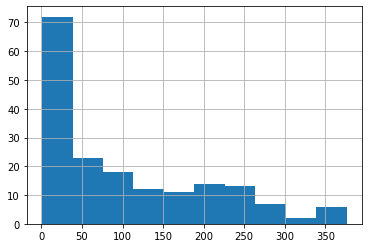

In [64]:
beer.hist()   ## => right skewed

In [65]:
beer.describe()

count    178.000000
mean     102.870787
std      100.645713
min        1.000000
25%       21.000000
50%       60.000000
75%      172.500000
max      376.000000
Name: beer_servings, dtype: float64

##### Skill  Challenge => Z scores 

In [66]:
# nEED TO CALCULATE EACH element is relatively smaller or larger than other
#so we use to compare them with mean ig negative its relatively low if positive relatively high


In [67]:
beer[:10]

country
Afghanistan            NaN
Albania               89.0
Algeria               25.0
Andorra              245.0
Angola               217.0
Antigua & Barbuda     12.0
Argentina            193.0
Armenia               21.0
Australia            261.0
Austria              279.0
Name: beer_servings, dtype: float64

In [68]:
beer[:10] - beer.mean()

country
Afghanistan                 NaN
Albania              -13.870787
Algeria              -77.870787
Andorra              142.129213
Angola               114.129213
Antigua & Barbuda    -90.870787
Argentina             90.129213
Armenia              -81.870787
Australia            158.129213
Austria              176.129213
Name: beer_servings, dtype: float64

In [74]:
(beer - beer.mean()).apply(lambda x:'low' if x>0  else 'high')

country
Afghanistan    high
Albania        high
Algeria        high
Andorra         low
Angola          low
               ... 
Venezuela       low
Vietnam         low
Yemen          high
Zambia         high
Zimbabwe       high
Name: beer_servings, Length: 193, dtype: object

In [75]:
(beer - beer.mean()).apply(lambda x:'low' if x>0  else 'high').value_counts()

high    127
low      66
Name: beer_servings, dtype: int64

In [76]:
#But this is not statistically correct way So we use  Z-SCORES

#### Z=(X−μ) /σ 

###### Here:

###### Z is the z-score.

###### X is the individual data point.
###### μ is the mean of the dataset.
###### σ is the standard deviation of the dataset.

###### The z-score helps you understand how far a particular data point is from the mean in terms of standard deviations. A positive z-score indicates that the data point is above the mean, while a negative z-score indicates that the data point is below the mean.

###### It's important to note that the z-score is meaningful when the data follows a normal distribution or is approximately normally distributed. If the data does not follow a normal distribution, other measures might be more appropriate.

In [77]:
z_score_for_beer=(beer-beer.mean())/beer.std()

In [78]:
z_score_for_beer

country
Afghanistan         NaN
Albania       -0.137818
Algeria       -0.773712
Andorra        1.412174
Angola         1.133970
                 ...   
Venezuela      2.286528
Vietnam        0.080771
Yemen         -0.962493
Zambia        -0.704161
Zimbabwe      -0.386214
Name: beer_servings, Length: 193, dtype: float64

In [79]:
z_score_for_beer.min()

-1.012172141315241

In [81]:
z_score_for_beer.max()

2.7137689844109123

In [82]:
## absolute max

In [83]:
z_score_for_beer.abs()

country
Afghanistan         NaN
Albania        0.137818
Algeria        0.773712
Andorra        1.412174
Angola         1.133970
                 ...   
Venezuela      2.286528
Vietnam        0.080771
Yemen          0.962493
Zambia         0.704161
Zimbabwe       0.386214
Name: beer_servings, Length: 193, dtype: float64

In [85]:
z_score_for_beer.abs().max()

2.7137689844109123

In [86]:
z_score_for_beer.idxmax()

'Namibia'

In [ ]:
# So namibia has abs max